# Crime Data

In [2]:
#Read Crime Data csv File
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 7 - Clustering\\crime_data.csv")

In [3]:
# shift column 'Name' to first position
first_column = df.pop('UrbanPop')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'UrbanPop', first_column)
df.head()

,Unnamed: 0,UrbanPop,Murder,Assault,Rape
0,Alabama,58,13.2,236,21.2
1,Alaska,48,10.0,263,44.5
2,Arizona,80,8.1,294,31.0
3,Arkansas,50,8.8,190,19.5
4,California,91,9.0,276,40.6


In [4]:
df.head()

,Unnamed: 0,UrbanPop,Murder,Assault,Rape
0,Alabama,58,13.2,236,21.2
1,Alaska,48,10.0,263,44.5
2,Arizona,80,8.1,294,31.0
3,Arkansas,50,8.8,190,19.5
4,California,91,9.0,276,40.6


#### Hierarchical Clustering

In [5]:
# Normalization function 
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(df.iloc[:,1:])

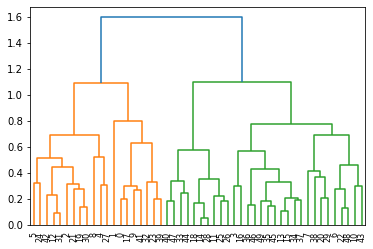

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [60]:
Clusters.value_counts()

Clusters
0           20
1           20
2           10
dtype: int64

In [61]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [62]:
df_norm['h_clusterid'] = y_hc

In [63]:
df['h_clusterid'] = y_hc
df.head()

,Unnamed: 0,UrbanPop,Murder,Assault,Rape,h_clusterid
0,Alabama,58,13.2,236,21.2,0
1,Alaska,48,10.0,263,44.5,0
2,Arizona,80,8.1,294,31.0,0
3,Arkansas,50,8.8,190,19.5,1
4,California,91,9.0,276,40.6,0


In [64]:
df.groupby(['h_clusterid']).mean()

,UrbanPop,Murder,Assault,Rape
h_clusterid,,,,
0,68.4,12.165,255.25,29.165
1,70.8,5.715,132.30,18.100
2,49.3,3.180,78.70,11.630


In [65]:
df.groupby(['h_clusterid']).describe()

UrbanPop                                                  Murder  \
               count  mean        std   min    25%   50%    75%   max  count   
h_clusterid                                                                    
0               20.0  68.4  14.463748  44.0  58.75  70.0  80.00  91.0   20.0   
1               20.0  70.8  10.714476  50.0  65.75  70.0  77.75  89.0   20.0   
2               10.0  49.3   9.165758  32.0  44.25  52.0  55.50  62.0   10.0   

                     ... Assault         Rape                                  \
               mean  ...     75%    max count    mean       std   min     25%   
h_clusterid          ...                                                        
0            12.165  ...   280.5  337.0  20.0  29.165  8.386473  16.1  23.625   
1             5.715  ...   159.0  238.0  20.0  18.100  5.065154   8.3  15.425   
2             3.180  ...    98.0  120.0  10.0  11.630  3.301868   7.3   9.350   

                                  
               50%     75%   max  
h_clusterid                       
0            27.35  32.850  46.0  
1            18.40  20.775  29.3  
2            11.25  13.850  16.5  

[3 rows x 32 columns]

###### Correlation between crimes and urbanpop for different clusters

In [67]:
df.groupby(['h_clusterid']).corr()

UrbanPop    Murder   Assault      Rape
h_clusterid                                                 
0           UrbanPop  1.000000 -0.480618 -0.082482  0.457275
            Murder   -0.480618  1.000000  0.087790 -0.514408
            Assault  -0.082482  0.087790  1.000000 -0.047986
            Rape      0.457275 -0.514408 -0.047986  1.000000
1           UrbanPop  1.000000 -0.504919 -0.040702 -0.118801
            Murder   -0.504919  1.000000  0.316219  0.246353
            Assault  -0.040702  0.316219  1.000000  0.127831
            Rape     -0.118801  0.246353  0.127831  1.000000
2           UrbanPop  1.000000  0.044480  0.432202  0.431791
            Murder    0.044480  1.000000  0.613128  0.586916
            Assault   0.432202  0.613128  1.000000  0.716490
            Rape      0.431791  0.586916  0.716490  1.000000

<AxesSubplot:ylabel='h_clusterid-None'>

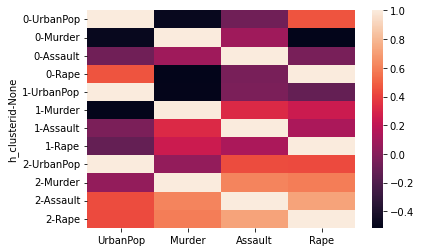

In [66]:
sn.heatmap(df.groupby(['h_clusterid']).corr(), annot=False)

In [25]:
df.iloc[:,1:5].corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Inferences
- The three clusters have high medium and low crime rates.
- The first 2 clusters have similar populations as well.
- Murder is negatively correlated to UrbanPop and Rape in cluster 1.
- Murder is negatively correlated to UrbanPop but  shows no correlation to Rape in cluster 2.
- Murder and Rape are weakly correlated and all others are positively correlated for cluster 3.
- Cluster 3 is in stark difference to the other clusters.

#### Kmeans Clustering

In [75]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [95]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 7 - Clustering\\crime_data.csv")
# shift column 'Name' to first position
first_column = df.pop('UrbanPop')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'UrbanPop', first_column)
df.head()
x=norm_func(df.iloc[:,1:])
x.head()

,UrbanPop,Murder,Assault,Rape
0,-0.520907,1.242564,0.782839,-0.003416
1,-1.211764,0.507862,1.106823,2.484203
2,0.998980,0.071633,1.478803,1.042878
3,-1.073593,0.232349,0.230868,-0.184917
4,1.758923,0.278268,1.262814,2.067820


In [96]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_CrimeData_df = scaler.fit_transform(df.iloc[:,1:])

C:\Users\shred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


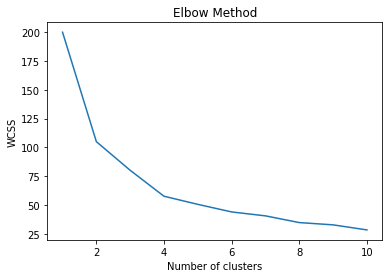

In [97]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_CrimeData_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
#Build Cluster algorithm. Number of clusters=4 from the above graph
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_CrimeData_df)

KMeans(n_clusters=4, random_state=0)

In [99]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [100]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_
df.head()

,Unnamed: 0,UrbanPop,Murder,Assault,Rape,clusterid_new
0,Alabama,58,13.2,236,21.2,3
1,Alaska,48,10.0,263,44.5,1
2,Arizona,80,8.1,294,31.0,1
3,Arkansas,50,8.8,190,19.5,3
4,California,91,9.0,276,40.6,1


In [101]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.58167593, -0.49440658, -0.3864845 , -0.26431024],
       [ 0.72997363,  0.70212683,  1.04999438,  1.28990383],
       [-0.93954982, -0.97130281, -1.11783581, -0.97657842],
       [-0.82279055,  1.42622412,  0.88321132,  0.01946669]])

In [102]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,UrbanPop,Murder,Assault,Rape
,,mean,mean,mean,mean
0,0,73.875000,5.656250,138.875000,18.781250
1,1,76.000000,10.815385,257.384615,33.192308
2,2,52.076923,3.600000,78.538462,12.176923
3,3,53.750000,13.937500,243.625000,21.412500


In [103]:
df.head()

,Unnamed: 0,UrbanPop,Murder,Assault,Rape,clusterid_new
0,Alabama,58,13.2,236,21.2,3
1,Alaska,48,10.0,263,44.5,1
2,Arizona,80,8.1,294,31.0,1
3,Arkansas,50,8.8,190,19.5,3
4,California,91,9.0,276,40.6,1


In [106]:
df['clusterid_new']=df['clusterid_new'].replace(0, 'Cluster 1')
df['clusterid_new']=df['clusterid_new'].replace(1, 'Cluster 2')
df['clusterid_new']=df['clusterid_new'].replace(2, 'Cluster 3')
df['clusterid_new']=df['clusterid_new'].replace(3, 'Cluster 4')
df.head()

,Unnamed: 0,UrbanPop,Murder,Assault,Rape,clusterid_new
0,Alabama,58,13.2,236,21.2,Cluster 4
1,Alaska,48,10.0,263,44.5,Cluster 2
2,Arizona,80,8.1,294,31.0,Cluster 2
3,Arkansas,50,8.8,190,19.5,Cluster 4
4,California,91,9.0,276,40.6,Cluster 2


In [108]:
df.groupby(['clusterid_new']).mean()

,UrbanPop,Murder,Assault,Rape
clusterid_new,,,,
Cluster 1,73.875000,5.656250,138.875000,18.781250
Cluster 2,76.000000,10.815385,257.384615,33.192308
Cluster 3,52.076923,3.600000,78.538462,12.176923
Cluster 4,53.750000,13.937500,243.625000,21.412500


In [113]:
df.groupby(['clusterid_new']).describe()

UrbanPop                                                        \
                 count       mean        std   min    25%   50%    75%   max   
clusterid_new                                                                  
Cluster 1         16.0  73.875000   8.935883  60.0  66.75  72.5  80.75  89.0   
Cluster 2         13.0  76.000000  10.770330  48.0  70.00  80.0  81.00  91.0   
Cluster 3         13.0  52.076923  10.086803  32.0  45.00  53.0  57.00  66.0   
Cluster 4          8.0  53.750000   8.048957  44.0  47.25  54.0  59.25  66.0   

              Murder             ... Assault         Rape             \
               count       mean  ...     75%    max count       mean   
clusterid_new                    ...                                   
Cluster 1       16.0   5.656250  ...   159.0  238.0  16.0  18.781250   
Cluster 2       13.0  10.815385  ...   285.0  335.0  13.0  33.192308   
Cluster 3       13.0   3.600000  ...   102.0  120.0  13.0  12.176923   
Cluster 4        8.0  13.937500  ...   264.0  337.0   8.0  21.412500   

                                                          
                    std   min    25%   50%     75%   max  
clusterid_new                                             
Cluster 1      5.236439   8.3  15.75  19.4  21.100  29.3  
Cluster 2      7.282337  24.0  27.80  31.9  38.700  46.0  
Cluster 3      3.258618   7.3   9.50  11.3  14.900  16.5  
Cluster 4      3.811425  16.1  18.90  21.7  23.325  26.9  

[4 rows x 32 columns]

###### Correlation between crimes and urbanpop for different clusters

In [121]:
df.groupby(['clusterid_new']).corr()

UrbanPop    Murder   Assault      Rape
clusterid_new                                                 
Cluster 1     UrbanPop  1.000000 -0.474605 -0.110751 -0.300816
              Murder   -0.474605  1.000000  0.073240  0.164140
              Assault  -0.110751  0.073240  1.000000 -0.124400
              Rape     -0.300816  0.164140 -0.124400  1.000000
Cluster 2     UrbanPop  1.000000  0.044932  0.010480 -0.243519
              Murder    0.044932  1.000000  0.404290 -0.139489
              Assault   0.010480  0.404290  1.000000  0.085231
              Rape     -0.243519 -0.139489  0.085231  1.000000
Cluster 3     UrbanPop  1.000000 -0.031472  0.157612  0.383398
              Murder   -0.031472  1.000000  0.639082  0.607573
              Assault   0.157612  0.639082  1.000000  0.702043
              Rape      0.383398  0.607573  0.702043  1.000000
Cluster 4     UrbanPop  1.000000  0.247473 -0.510747  0.719105
              Murder    0.247473  1.000000  0.197679  0.265610
              Assault  -0.510747  0.197679  1.000000 -0.650782
              Rape      0.719105  0.265610 -0.650782  1.000000

In [128]:
["UrbanPop" ,"Murder","Assault","Rape"]*4

['UrbanPop',
 'Murder',
 'Assault',
 'Rape',
 'UrbanPop',
 'Murder',
 'Assault',
 'Rape',
 'UrbanPop',
 'Murder',
 'Assault',
 'Rape',
 'UrbanPop',
 'Murder',
 'Assault',
 'Rape']

In [137]:
a

UrbanPop    Murder   Assault      Rape Parameter
clusterid_new                                                           
Cluster 1     UrbanPop  1.000000 -0.474605 -0.110751 -0.300816  UrbanPop
              Murder   -0.474605  1.000000  0.073240  0.164140    Murder
              Assault  -0.110751  0.073240  1.000000 -0.124400   Assault
              Rape     -0.300816  0.164140 -0.124400  1.000000      Rape
Cluster 2     UrbanPop  1.000000  0.044932  0.010480 -0.243519  UrbanPop
              Murder    0.044932  1.000000  0.404290 -0.139489    Murder
              Assault   0.010480  0.404290  1.000000  0.085231   Assault
              Rape     -0.243519 -0.139489  0.085231  1.000000      Rape
Cluster 3     UrbanPop  1.000000 -0.031472  0.157612  0.383398  UrbanPop
              Murder   -0.031472  1.000000  0.639082  0.607573    Murder
              Assault   0.157612  0.639082  1.000000  0.702043   Assault
              Rape      0.383398  0.607573  0.702043  1.000000      Rape
Cluster 4     UrbanPop  1.000000  0.247473 -0.510747  0.719105  UrbanPop
              Murder    0.247473  1.000000  0.197679  0.265610    Murder
              Assault  -0.510747  0.197679  1.000000 -0.650782   Assault
              Rape      0.719105  0.265610 -0.650782  1.000000      Rape

In [147]:
a=df.groupby(['clusterid_new']).corr()
a.loc[:,"Parameter"]=["UrbanPop" ,"Murder","Assault","Rape"]*4
asorted_df=a.sort_values(by='Parameter',ascending=False)
asorted_df.pop('Parameter')
asorted_df

,,UrbanPop,Murder,Assault,Rape
clusterid_new,,,,,
Cluster 1,UrbanPop,1.000000,-0.474605,-0.110751,-0.300816
Cluster 2,UrbanPop,1.000000,0.044932,0.010480,-0.243519
Cluster 3,UrbanPop,1.000000,-0.031472,0.157612,0.383398
Cluster 4,UrbanPop,1.000000,0.247473,-0.510747,0.719105
Cluster 1,Rape,-0.300816,0.164140,-0.124400,1.000000
Cluster 2,Rape,-0.243519,-0.139489,0.085231,1.000000
Cluster 3,Rape,0.383398,0.607573,0.702043,1.000000
Cluster 4,Rape,0.719105,0.265610,-0.650782,1.000000
Cluster 1,Murder,-0.474605,1.000000,0.073240,0.164140


<AxesSubplot:ylabel='clusterid_new-None'>

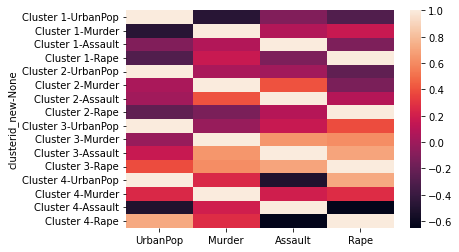

In [143]:
sn.heatmap(df.groupby(['clusterid_new']).corr(), annot=False)#Cluster-wise heatmap

<AxesSubplot:ylabel='clusterid_new-None'>

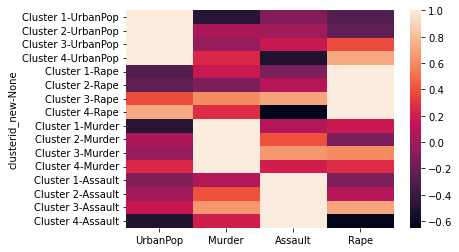

In [148]:
sn.heatmap(asorted_df, annot=False)#Parameter-wise headmap

Inferences:
- Cluster id increases with the increase in correlation between Rape and UrbanPop.
- Cluster id does not share such relationship with correlation between any other parameters.

In [157]:
a

UrbanPop    Murder   Assault      Rape Parameter
clusterid_new                                                           
Cluster 1     UrbanPop  1.000000 -0.474605 -0.110751 -0.300816  UrbanPop
              Murder   -0.474605  1.000000  0.073240  0.164140    Murder
              Assault  -0.110751  0.073240  1.000000 -0.124400   Assault
              Rape     -0.300816  0.164140 -0.124400  1.000000      Rape
Cluster 2     UrbanPop  1.000000  0.044932  0.010480 -0.243519  UrbanPop
              Murder    0.044932  1.000000  0.404290 -0.139489    Murder
              Assault   0.010480  0.404290  1.000000  0.085231   Assault
              Rape     -0.243519 -0.139489  0.085231  1.000000      Rape
Cluster 3     UrbanPop  1.000000 -0.031472  0.157612  0.383398  UrbanPop
              Murder   -0.031472  1.000000  0.639082  0.607573    Murder
              Assault   0.157612  0.639082  1.000000  0.702043   Assault
              Rape      0.383398  0.607573  0.702043  1.000000      Rape
Cluster 4     UrbanPop  1.000000  0.247473 -0.510747  0.719105  UrbanPop
              Murder    0.247473  1.000000  0.197679  0.265610    Murder
              Assault  -0.510747  0.197679  1.000000 -0.650782   Assault
              Rape      0.719105  0.265610 -0.650782  1.000000      Rape

In [169]:
a.loc["Cluster 1"].loc["Murder","UrbanPop"]

-0.47460522966054175

In [178]:
b=pd.DataFrame(pd.Series([]),columns=["Correlation"])
for i in ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]:
    for j in ['UrbanPop', 'Murder', 'Assault', 'Rape']:
        for k in ['UrbanPop', 'Murder', 'Assault', 'Rape']:
            if j!=k:
                b.loc[i+j+k]=a.loc[i].loc[j,k]
Correlations=b

C:\Users\shred\AppData\Local\Temp/ipykernel_596/3802011018.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b=pd.DataFrame(pd.Series([]),columns=["Correlation"])


In [190]:
#Drop Duplicates and sort values
c=Correlations.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False).sort_values(by='Correlation',ascending=False)
c

,Correlation
Cluster 4UrbanPopRape,0.719105
Cluster 3AssaultRape,0.702043
Cluster 3MurderAssault,0.639082
Cluster 3MurderRape,0.607573
Cluster 2MurderAssault,0.404290
Cluster 3UrbanPopRape,0.383398
Cluster 4MurderRape,0.265610
Cluster 4UrbanPopMurder,0.247473
Cluster 4MurderAssault,0.197679
Cluster 1MurderRape,0.164140


Inferences
- Cluster 4 has the highest correlation between Rape and UrbanPop.
- Followed by Cluster 3AssaultRape, Cluster 3MurderAssault, Cluster 3MurderRape.
- Strong Negative correlation for Cluster 4AssaultRape.

In [112]:
df.iloc[:,1:5].corr()

,UrbanPop,Murder,Assault,Rape
UrbanPop,1.000000,0.069573,0.258872,0.411341
Murder,0.069573,1.000000,0.801873,0.563579
Assault,0.258872,0.801873,1.000000,0.665241
Rape,0.411341,0.563579,0.665241,1.000000


In [105]:
df['clusterid_new'].value_counts()

Cluster 1    16
Cluster 2    13
Cluster 3    13
Cluster 4     8
Name: clusterid_new, dtype: int64

#### DBSCAN

In [211]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 7 - Clustering\\crime_data.csv")
# shift column 'Name' to first position
first_column = df.pop('UrbanPop')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'UrbanPop', first_column)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   UrbanPop    50 non-null     int64  
 2   Murder      50 non-null     float64
 3   Assault     50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [212]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,UrbanPop,Murder,Assault,Rape
0,58,13.2,236,21.2
1,48,10.0,263,44.5
2,80,8.1,294,31.0
3,50,8.8,190,19.5
4,91,9.0,276,40.6


In [213]:
array=df.values
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

Text(0, 0.5, 'Distance')

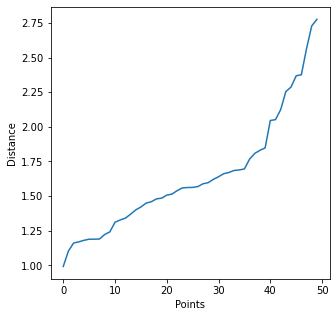

In [214]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.696


<Figure size 360x360 with 0 Axes>

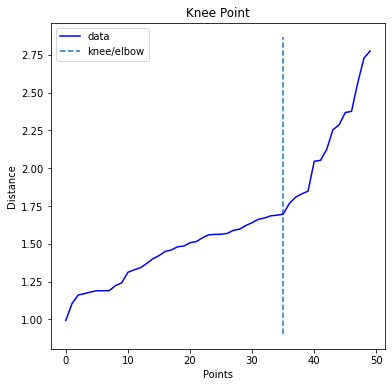

In [215]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee].round(3))

In [216]:
dbscan = DBSCAN(eps=1.696, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=1.696, min_samples=6)

In [217]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [218]:
df['Cluster']=pd.DataFrame(dbscan.labels_)
df

,UrbanPop,Murder,Assault,Rape,Cluster
0,58,13.2,236,21.2,0
1,48,10.0,263,44.5,-1
2,80,8.1,294,31.0,0
3,50,8.8,190,19.5,0
4,91,9.0,276,40.6,0
5,78,7.9,204,38.7,0
6,77,3.3,110,11.1,0
7,72,5.9,238,15.8,0
8,80,15.4,335,31.9,0
9,60,17.4,211,25.8,0


In [219]:
df['Cluster'].value_counts()

 0    49
-1     1
Name: Cluster, dtype: int64

In [220]:
X=metrics.silhouette_score(X,dbscan.labels_)
X #Given a silhouette_score so close to 0, the clustering has a lot of overlaps.

0.23455598753159798

Inferences:
- DBSCAN has formed the lowest number of clusters which is 2.
- It has excluded only one point out of 50 points.
- Hierarchical Clustering and KMeans clustering seem better in these scenarios.

# Airlines

In [227]:
df = pd.read_excel("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 7 - Clustering\\EastWestAirlines.xlsx",sheet_name = 'data')
# Read the values of the file in the dataframe
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [228]:
df.pop('ID#')
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [232]:
df.shape

(3999, 11)

#### Hierarchical Clustering

In [234]:
# Normalization function 
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [235]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(df)

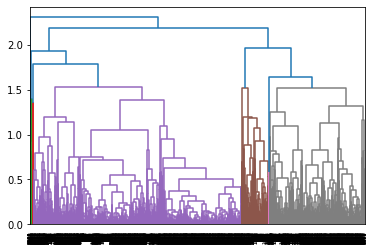

In [236]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [237]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [238]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [239]:
Clusters.value_counts()

Clusters
2           2526
0           1469
1              4
dtype: int64

In [240]:
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [241]:
df_norm['h_clusterid'] = y_hc

In [242]:
df['h_clusterid'] = y_hc
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [243]:
df.groupby(['h_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167


In [244]:
df.groupby(['h_clusterid']).describe()

Balance                                                   \
              count           mean            std      min       25%   
h_clusterid                                                            
0            1469.0   97189.586113  135061.383470      0.0  24100.00   
1               4.0  131999.500000  118216.494998  27619.0  46828.75   
2            2526.0   59791.056611   70273.290372     50.0  16581.25   

                                            Qual_miles              ...  \
                  50%        75%        max      count        mean  ...   
h_clusterid                                                         ...   
0             55472.0  119735.00  1704838.0     1469.0  239.728387  ...   
1            106673.0  191843.75   287033.0        4.0  347.000000  ...   
2             37233.5   78943.00  1125076.0     2526.0   88.188836  ...   

            Days_since_enroll          Award?                                \
                          75%     max   count      mean       std  min  25%   
h_clusterid                                                                   
0                     6193.00  8296.0  1469.0  1.000000  0.000000  1.0  1.0   
1                     2661.75  3831.0     4.0  1.000000  0.000000  1.0  1.0   
2                     5459.50  8296.0  2526.0  0.003167  0.056199  0.0  0.0   

                            
             50%  75%  max  
h_clusterid                 
0            1.0  1.0  1.0  
1            1.0  1.0  1.0  
2            0.0  0.0  1.0  

[3 rows x 88 columns]

###### Correlation for different clusters

In [245]:
df.groupby(['h_clusterid']).corr()

Balance  Qual_miles  cc1_miles  cc2_miles  \
h_clusterid                                                                 
0           Balance            1.000000    0.129625   0.161339   0.024677   
            Qual_miles         0.129625    1.000000  -0.046101  -0.021187   
            cc1_miles          0.161339   -0.046101   1.000000  -0.080393   
            cc2_miles          0.024677   -0.021187  -0.080393   1.000000   
            cc3_miles         -0.006820   -0.015895   0.082019  -0.005660   
            Bonus_miles        0.296464   -0.017078   0.774593  -0.050125   
            Bonus_trans        0.224405    0.035165   0.556346   0.055400   
            Flight_miles_12mo  0.238256    0.155847  -0.061182   0.011573   
            Flight_trans_12    0.272408    0.175041  -0.065929   0.011521   
            Days_since_enroll  0.241497    0.029940   0.181983  -0.000018   
            Award?                  NaN         NaN        NaN        NaN   
1           Balance            1.000000   -0.365755  -0.894465        NaN   
            Qual_miles        -0.365755    1.000000   0.259962        NaN   
            cc1_miles         -0.894465    0.259962   1.000000        NaN   
            cc2_miles               NaN         NaN        NaN        NaN   
            cc3_miles               NaN         NaN        NaN        NaN   
            Bonus_miles       -0.949222    0.477594   0.714634        NaN   
            Bonus_trans       -0.191016    0.298451  -0.266242        NaN   
            Flight_miles_12mo -0.116992    0.681586  -0.261649        NaN   
            Flight_trans_12    0.882214   -0.337793  -0.995585        NaN   
            Days_since_enroll -0.118514    0.683363   0.372439        NaN   
            Award?                  NaN         NaN        NaN        NaN   
2           Balance            1.000000    0.030899   0.519679  -0.018048   
            Qual_miles         0.030899    1.000000  -0.001544  -0.007967   
            cc1_miles          0.519679   -0.001544   1.000000  -0.059525   
            cc2_miles         -0.018048   -0.007967  -0.059525   1.000000   
            cc3_miles          0.092757   -0.000378   0.042627  -0.006607   
            Bonus_miles        0.532052    0.017602   0.882720   0.048318   
            Bonus_trans        0.395740    0.004558   0.587699   0.099736   
            Flight_miles_12mo  0.131316    0.051543  -0.007587   0.038674   
            Flight_trans_12    0.148999    0.055654  -0.014427   0.084664   
            Days_since_enroll  0.267634   -0.026575   0.185407   0.001223   
            Award?            -0.004238    0.016945  -0.028310   0.480993   

                               cc3_miles  Bonus_miles  Bonus_trans  \
h_clusterid                                                          
0           Balance            -0.006820     0.296464     0.224405   
            Qual_miles         -0.015895    -0.017078     0.035165   
            cc1_miles           0.082019     0.774593     0.556346   
            cc2_miles          -0.005660    -0.050125     0.055400   
            cc3_miles           1.000000     0.210124     0.108857   
            Bonus_miles         0.210124     1.000000     0.542619   
            Bonus_trans         0.108857     0.542619     1.000000   
            Flight_miles_12mo  -0.016849     0.116275     0.383987   
            Flight_trans_12    -0.018881     0.106708     0.458835   
            Days_since_enroll  -0.000672     0.181649     0.127537   
            Award?                   NaN          NaN          NaN   
1           Balance                  NaN    -0.949222    -0.191016   
            Qual_miles               NaN     0.477594     0.298451   
            cc1_miles                NaN     0.714634    -0.266242   
            cc2_miles                NaN          NaN          NaN   
            cc3_miles                NaN          NaN          NaN   
            Bonus_miles              NaN     1.000000     0.483429   
      

<AxesSubplot:ylabel='h_clusterid-None'>

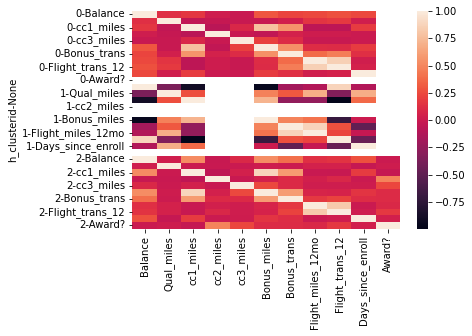

In [247]:
#Correlations heatmap
sn.heatmap(df.groupby(['h_clusterid']).corr(), annot=False)

#### Kmeans Clustering

In [259]:
df.pop('h_clusterid')
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,7


In [248]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [95]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 7 - Clustering\\crime_data.csv")
# shift column 'Name' to first position
first_column = df.pop('UrbanPop')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'UrbanPop', first_column)
df.head()
x=norm_func(df.iloc[:,1:])
x.head()

,UrbanPop,Murder,Assault,Rape
0,-0.520907,1.242564,0.782839,-0.003416
1,-1.211764,0.507862,1.106823,2.484203
2,0.998980,0.071633,1.478803,1.042878
3,-1.073593,0.232349,0.230868,-0.184917
4,1.758923,0.278268,1.262814,2.067820


In [249]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Airlines_df = scaler.fit_transform(df)

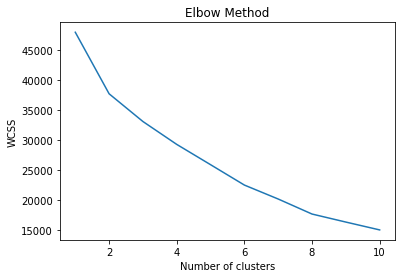

In [252]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [261]:
#Build Cluster algorithm. Number of clusters=8 from the above graph
from sklearn.cluster import KMeans
clusters_new = KMeans(8, random_state=0)
clusters_new.fit(scaled_Airlines_df)

KMeans(random_state=0)

In [262]:
clusters_new.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [263]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,7


In [264]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.36891023, -0.1426612 , -0.72368152, -0.09824189, -0.059797  ,
        -0.60080587, -0.65014202, -0.20057408, -0.2272022 , -0.29588632,
        -0.7669193 ,  0.76322299],
       [ 0.43009368,  7.24438815, -0.08513341, -0.09824189, -0.06276658,
        -0.01793432,  0.04546275,  0.31098282,  0.34262772, -0.09325468,
         0.26849943, -0.2742103 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735, -0.06672364],
       [ 0.3980386 , -0.15314015,  0.87105782, -0.09824189, -0.05560221,
         0.42743002,  0.6205541 , -0.18871256, -0.20986933,  0.23485992,
        -0.7669193 ,  0.76322299],
       [-0.14549768, -0.0594927 , -0.2691441 , -0.09824189, -0.06276658,
        -0.27457786, -0.11042714, -0.02932837, -0.02237714,  0.06280448,
         1.30391816, -1.31164359],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  

In [265]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,36428.802319,33.756522,1.063188,1.000000,1.000580,2636.617391,5.358841,179.245217,0.511884,3507.590725,0.000000
1,1,116938.884615,5748.134615,1.942308,1.000000,1.000000,16711.769231,12.038462,895.442308,2.673077,3926.000000,0.500000
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,113708.916084,25.650350,3.258741,1.000000,1.001399,27466.404196,17.560839,195.851748,0.577622,4603.516084,0.000000
4,4,58940.535316,98.092937,1.688971,1.000000,1.000000,10514.354399,10.541512,418.995043,1.288724,4248.242875,1.000000
5,5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,6,211959.333333,590.693694,2.324324,1.000000,1.000000,36641.819820,30.135135,6351.540541,18.522523,4811.315315,0.828829
7,7,128030.538606,101.564972,4.235405,1.000000,1.001883,54451.369115,20.608286,505.018832,1.587571,5125.421846,1.000000


In [266]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,7


In [267]:
df['clusterid_new']=df['clusterid_new'].replace(0, 'Cluster 1')
df['clusterid_new']=df['clusterid_new'].replace(1, 'Cluster 2')
df['clusterid_new']=df['clusterid_new'].replace(2, 'Cluster 3')
df['clusterid_new']=df['clusterid_new'].replace(3, 'Cluster 4')
df['clusterid_new']=df['clusterid_new'].replace(4, 'Cluster 5')
df['clusterid_new']=df['clusterid_new'].replace(5, 'Cluster 6')
df['clusterid_new']=df['clusterid_new'].replace(6, 'Cluster 7')
df['clusterid_new']=df['clusterid_new'].replace(7, 'Cluster 8')
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 1
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 1
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 1
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 8


In [268]:
df.groupby(['clusterid_new']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_new,,,,,,,,,,,
Cluster 1,36428.802319,33.756522,1.063188,1.000000,1.000580,2636.617391,5.358841,179.245217,0.511884,3507.590725,0.000000
Cluster 2,116938.884615,5748.134615,1.942308,1.000000,1.000000,16711.769231,12.038462,895.442308,2.673077,3926.000000,0.500000
Cluster 3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
Cluster 4,113708.916084,25.650350,3.258741,1.000000,1.001399,27466.404196,17.560839,195.851748,0.577622,4603.516084,0.000000
Cluster 5,58940.535316,98.092937,1.688971,1.000000,1.000000,10514.354399,10.541512,418.995043,1.288724,4248.242875,1.000000
Cluster 6,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
Cluster 7,211959.333333,590.693694,2.324324,1.000000,1.000000,36641.819820,30.135135,6351.540541,18.522523,4811.315315,0.828829
Cluster 8,128030.538606,101.564972,4.235405,1.000000,1.001883,54451.369115,20.608286,505.018832,1.587571,5125.421846,1.000000


In [269]:
#df.groupby(['clusterid_new']).describe()

###### Correlations for different clusters

In [270]:
df.groupby(['clusterid_new']).corr()

Balance  Qual_miles  cc1_miles  cc2_miles  \
clusterid_new                                                                 
Cluster 1     Balance            1.000000    0.029083   0.097942        NaN   
              Qual_miles         0.029083    1.000000   0.008908        NaN   
              cc1_miles          0.097942    0.008908   1.000000        NaN   
              cc2_miles               NaN         NaN        NaN        NaN   
              cc3_miles          0.042805   -0.003226  -0.006079        NaN   
...                                   ...         ...        ...        ...   
Cluster 8     Bonus_trans        0.033360    0.029679   0.061772        NaN   
              Flight_miles_12mo  0.141507    0.135079  -0.069377        NaN   
              Flight_trans_12    0.147137    0.126831  -0.048593        NaN   
              Days_since_enroll  0.194218   -0.031463   0.055134        NaN   
              Award?                  NaN         NaN        NaN        NaN   

                                 cc3_miles  Bonus_miles  Bonus_trans  \
clusterid_new                                                          
Cluster 1     Balance             0.042805     0.232499     0.094821   
              Qual_miles         -0.003226     0.001994    -0.015930   
              cc1_miles          -0.006079     0.418560     0.257021   
              cc2_miles                NaN          NaN          NaN   
              cc3_miles           1.000000     0.102085     0.023530   
...                                    ...          ...          ...   
Cluster 8     Bonus_trans         0.007894     0.249655     1.000000   
              Flight_miles_12mo  -0.027365     0.159279     0.396138   
              Flight_trans_12    -0.027897     0.162341     0.456282   
              Days_since_enroll  -0.075634     0.069763    -0.068553   
              Award?                   NaN          NaN          NaN   

                                 Flight_miles_12mo  Flight_trans_12  \
clusterid_new                                                         
Cluster 1     Balance                     0.150732         0.170388   
              Qual_miles                  0.035240         0.047340   
              cc1_miles                  -0.059189        -0.075820   
              cc2_miles                        NaN              NaN   
              cc3_miles                  -0.006817        -0.008273   
...                                            ...              ...   
Cluster 8     Bonus_trans                 0.396138         0.456282   
              Flight_miles_12mo           1.000000         0.838951   
              Flight_trans_12             0.838951         1.000000   
              Days_since_enroll           0.007758        -0.003660   
              Award?                           NaN              NaN   

                                 Days_since_enroll  Award?  
clusterid_new                                               
Cluster 1     Balance                     0.171295     NaN  
              Qual_miles                 -0.009804     NaN  
              cc1_miles                  -0.026038     NaN  
              cc2_miles                        NaN     NaN  
              cc3_miles                   0.042211     NaN  
...                                            ...     ...  
Cluster 8     Bonus_trans                -0.068553     NaN  
              Flight_miles_12mo           0.007758     NaN  
              Flight_trans_12            -0.003660     NaN  
              Days_since_enroll           1.000000     NaN  
              Award?                           NaN     NaN  

[88 rows x 11 columns]

<AxesSubplot:ylabel='clusterid_new-None'>

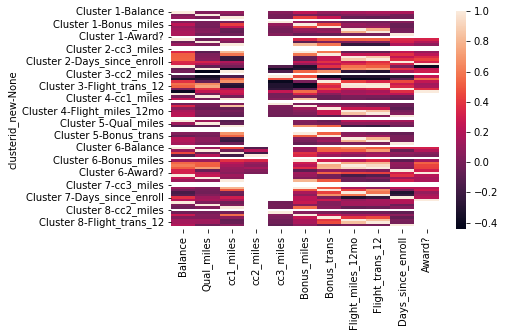

In [271]:
sn.heatmap(df.groupby(['clusterid_new']).corr(), annot=False)#Cluster-wise heatmap

In [273]:
df['clusterid_new'].value_counts()

Cluster 1    1725
Cluster 5     807
Cluster 4     715
Cluster 8     531
Cluster 7     111
Cluster 2      52
Cluster 6      43
Cluster 3      15
Name: clusterid_new, dtype: int64

#### DBSCAN

In [274]:
# Pop column 'clusterid_new'
df.pop('clusterid_new')

0       Cluster 1
1       Cluster 1
2       Cluster 1
3       Cluster 1
4       Cluster 8
          ...    
3994    Cluster 5
3995    Cluster 5
3996    Cluster 5
3997    Cluster 1
3998    Cluster 1
Name: clusterid_new, Length: 3999, dtype: object

In [275]:
array=df.values
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

Text(0, 0.5, 'Distance')

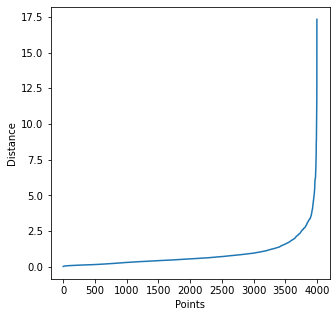

In [276]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.595


<Figure size 360x360 with 0 Axes>

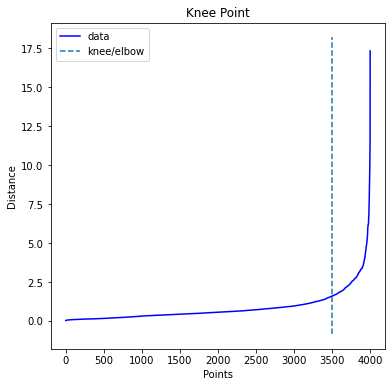

In [277]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee].round(3))

In [278]:
dbscan = DBSCAN(eps=1.595, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=1.595, min_samples=6)

In [279]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [280]:
df['Cluster']=pd.DataFrame(dbscan.labels_)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [281]:
df['Cluster'].value_counts()

 0    2420
 1    1264
-1     292
 2      15
 3       8
Name: Cluster, dtype: int64

In [282]:
X=metrics.silhouette_score(X,dbscan.labels_)
X #Given a silhouette_score so close to 0, the clustering has a lot of overlaps.

0.2553979322330913

Inferences:
- Hierarchical Clustering has formed the lowest number of clusters which is 3.
- Hierarchical Clustering and KMeans clustering seem better in these scenarios.